In [1]:
suppressWarnings(
    {
        library(dplyr)
        library(ggplot2)
        library(stringr)
    }
)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
INDIR <- '/rds/general/user/snb20/home/3_COVID19/Thesis'

In [3]:
final_df <- read.csv(paste(INDIR, "COVID19_vs_healthy_pseudobulk_EDGER_filtered.csv", sep='/'), row.names=1)

In [4]:
clusters = c("EC.Aerocyte","EC.Arterial","EC.Capillary","EC.Venous.Pul","EC.Venous.Sys","EC.Lymphatic")

In [12]:
#clusters = c("EC.Venous.Sys","EC.Venous.Pul","EC.Capillary","EC.Arterial","EC.Aerocyte")

##GO0050818 : regulation of vascular permeability

In [44]:
GOI <- c("ESAM","CLDN5","S1PR1","GJA1","CDH5","PECAM1")

In [45]:
df2 <- final_df[which(final_df$cell_state %in% clusters & final_df$Gene %in% GOI),]
df2$Gene <- factor(df2$Gene, levels=GOI)

In [46]:
df2$comparison_celltype <- paste(df2$comparison, df2$cell_state, sep='_')

In [47]:
levels(df2$comparison)

NULL

In [48]:
df2$comparison <- factor(df2$comparison, levels=rev(c('COVID.19','Healthy')))

In [49]:
df$cell_state<- factor(df$cell_state, levels=rev(sort(df$cell_state)))

ERROR: Error in df$cell_state: object of type 'closure' is not subsettable


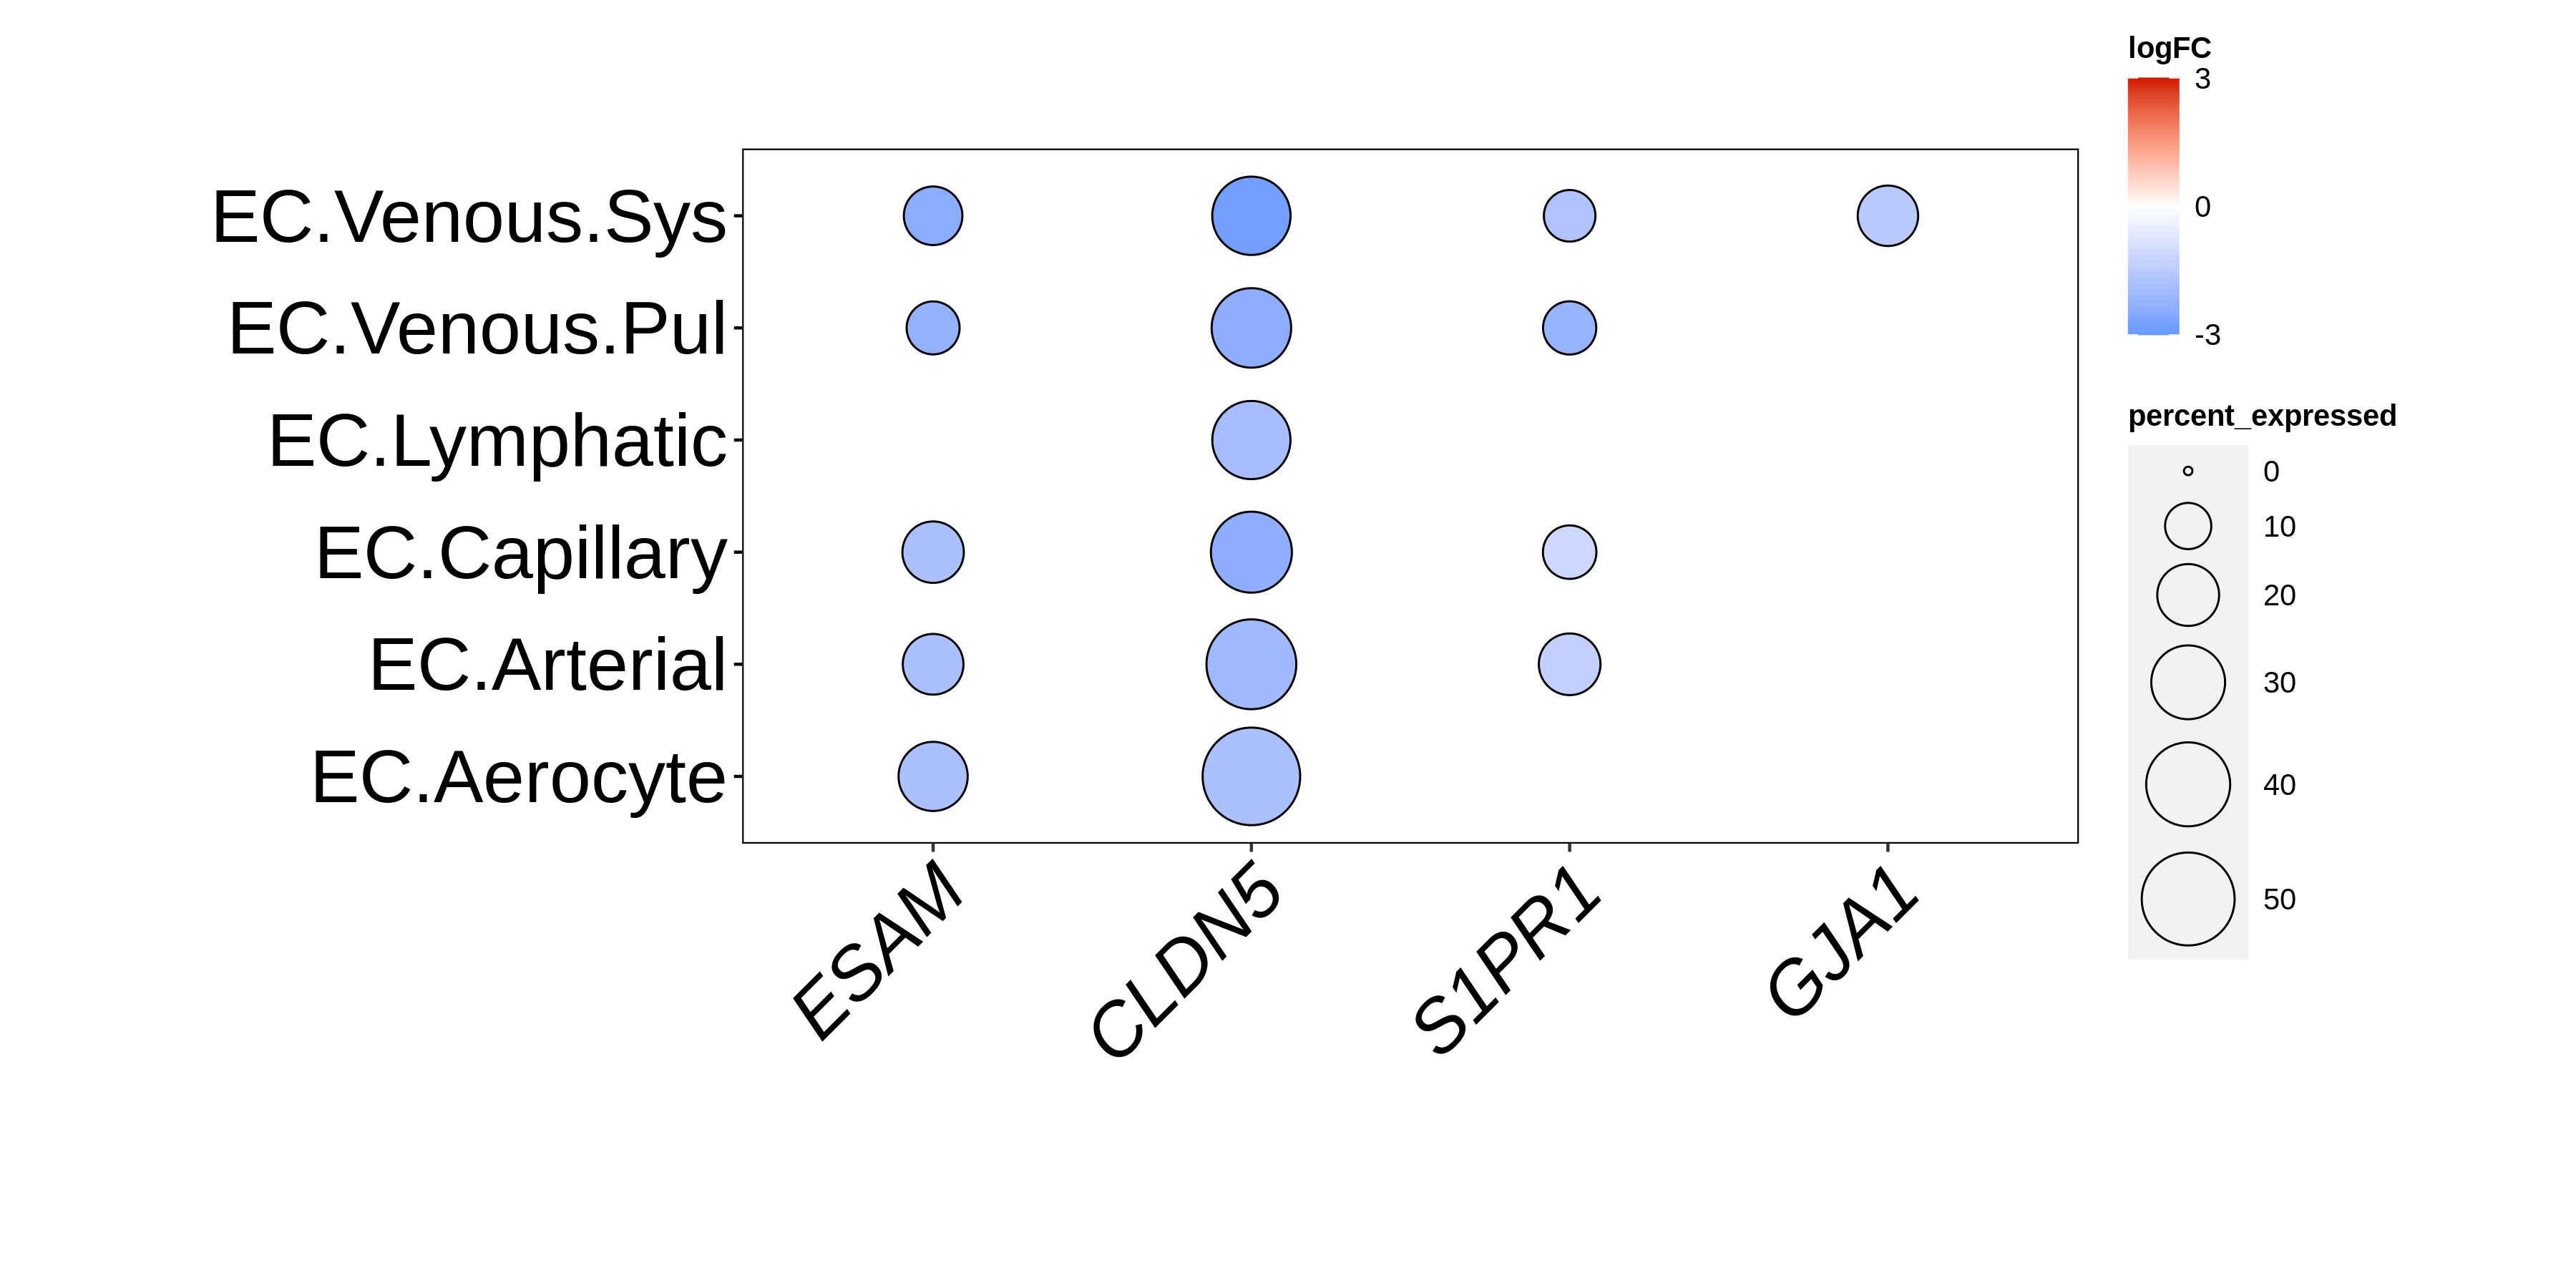

In [50]:
#pdf(width=12,height=6,file="coag_degs_margin.pdf") #uncomment to save as pdf. Change width and height accordingly
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300) # adjust width and height as necessary if more genes/clusters are included

#df3<-df2[df2$FDR<=0.05 & (df2$logFC<=-1 | df2$logFC>=1),]
#df3<-df2[df2$FDR<=0.05,]
df3<-df2
#df3$FDR_plot[df3$FDR > 0.05 | (df3$logFC > -1 & df3$logFC < 1)] <- NA
#df3$logFC[df3$FDR > 0.05 | (df3$logFC > -1 & df3$logFC < 1)] <- NA
df3$FDR_plot[df3$FDR > 0.05] <- 0
border_ldFC <- ceiling(max(abs(df3$logFC)))
#min_logp=min(df3$FDR_plot)
min_logp=0
max_logp=max(df3$percent_expressed)
g <- ggplot() + 
    geom_point(data=df3, aes(x=Gene, y=cell_state, fill=logFC, size=percent_expressed), colour="black",pch=21, stroke=0.5) + 
    theme(
              axis.text.x=element_text(size=25, color="black", angle=45, hjust=1, face = "italic"),
              axis.title=element_text(size=20, color="black", face = "bold"),
              axis.text.y=element_text(size=25, color="black"),
              axis.ticks.y=element_line(color="black"),
              plot.title = element_text(size = 25, face = "bold"),
              legend.title=element_text(size=10, face = "bold"), 
              legend.text=element_text(size=10),
              panel.background = element_rect(fill = NA, color="black"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              plot.margin = margin(50,50,50,50)
             ) + scale_fill_gradient2(low="#6699FF", mid = "white", high="#D21404", 
                                      breaks=c(-border_ldFC,0,border_ldFC), 
                                      limits=c(-border_ldFC,border_ldFC)) + xlab("")+ ylab("") + 
scale_size(range = c(1,15
                    ), limits= c(min_logp,max_logp)) 
rm (df3)
rm (border_ldFC)
rm (min_logp)
rm (max_logp)
#ggsave(plot=g,height=6,width=12,dpi=300, filename="./dotplot_all_comparisons_other_genes.pdf", useDingbats=FALSE)
g
#dev.off() #uncomment when saving pdf

In [13]:
GOI <- c('CLDN5','ESAM','S1PR1','GJA1','ROCK2','ZDHHC21','ROBO4','MYADM','TJP2','SOX18')

In [65]:
GOI <- c('ROCK2','ZDHHC21','EZR','MYD88','ROBO4','MYADM','FASN','PDE2A','RAP1A','RAP1B','RAPGEF6','PDE4D','RAP2B','F11R','PTPRS','TJP1','RAPGEF3','PPP1R12A','ICAM1','PECAM1','RAB1C','PPP1R16B','PLCB1','TJP2','RAPGEF1','RAPGEF2','SOX18','RDX','AFDN','ROCK1','S1PR2','AKAP11','TNFRSF19','TNF','CLDN3','RAB1B','MARVELD2','TNFRSF1A','IKBKB','IL1B','RAP2C','RAB1A','F2RL1','HPSE','TNFRSF21','CDH5','DICER1','IL4','S1PR3','MIR874','CLDN1','EDNRA','ADD1','EDNRB','VCL','PROC','ABCB1','MSN','VEGFA','TJP3','CDC45','FOXP3')

In [14]:
df2 <- final_df[which(final_df$cell_state %in% clusters & final_df$Gene %in% GOI),]
df2$Gene <- factor(df2$Gene, levels=GOI)

In [15]:
df2$comparison_celltype <- paste(df2$comparison, df2$cell_state, sep='_')

In [16]:
levels(df2$comparison)

NULL

In [17]:
df2$comparison <- factor(df2$comparison, levels=rev(c('COVID.19','Healthy')))

In [18]:
df$cell_state<- factor(df$cell_state, levels=rev(sort(df$cell_state)))

ERROR: Error in df$cell_state: object of type 'closure' is not subsettable


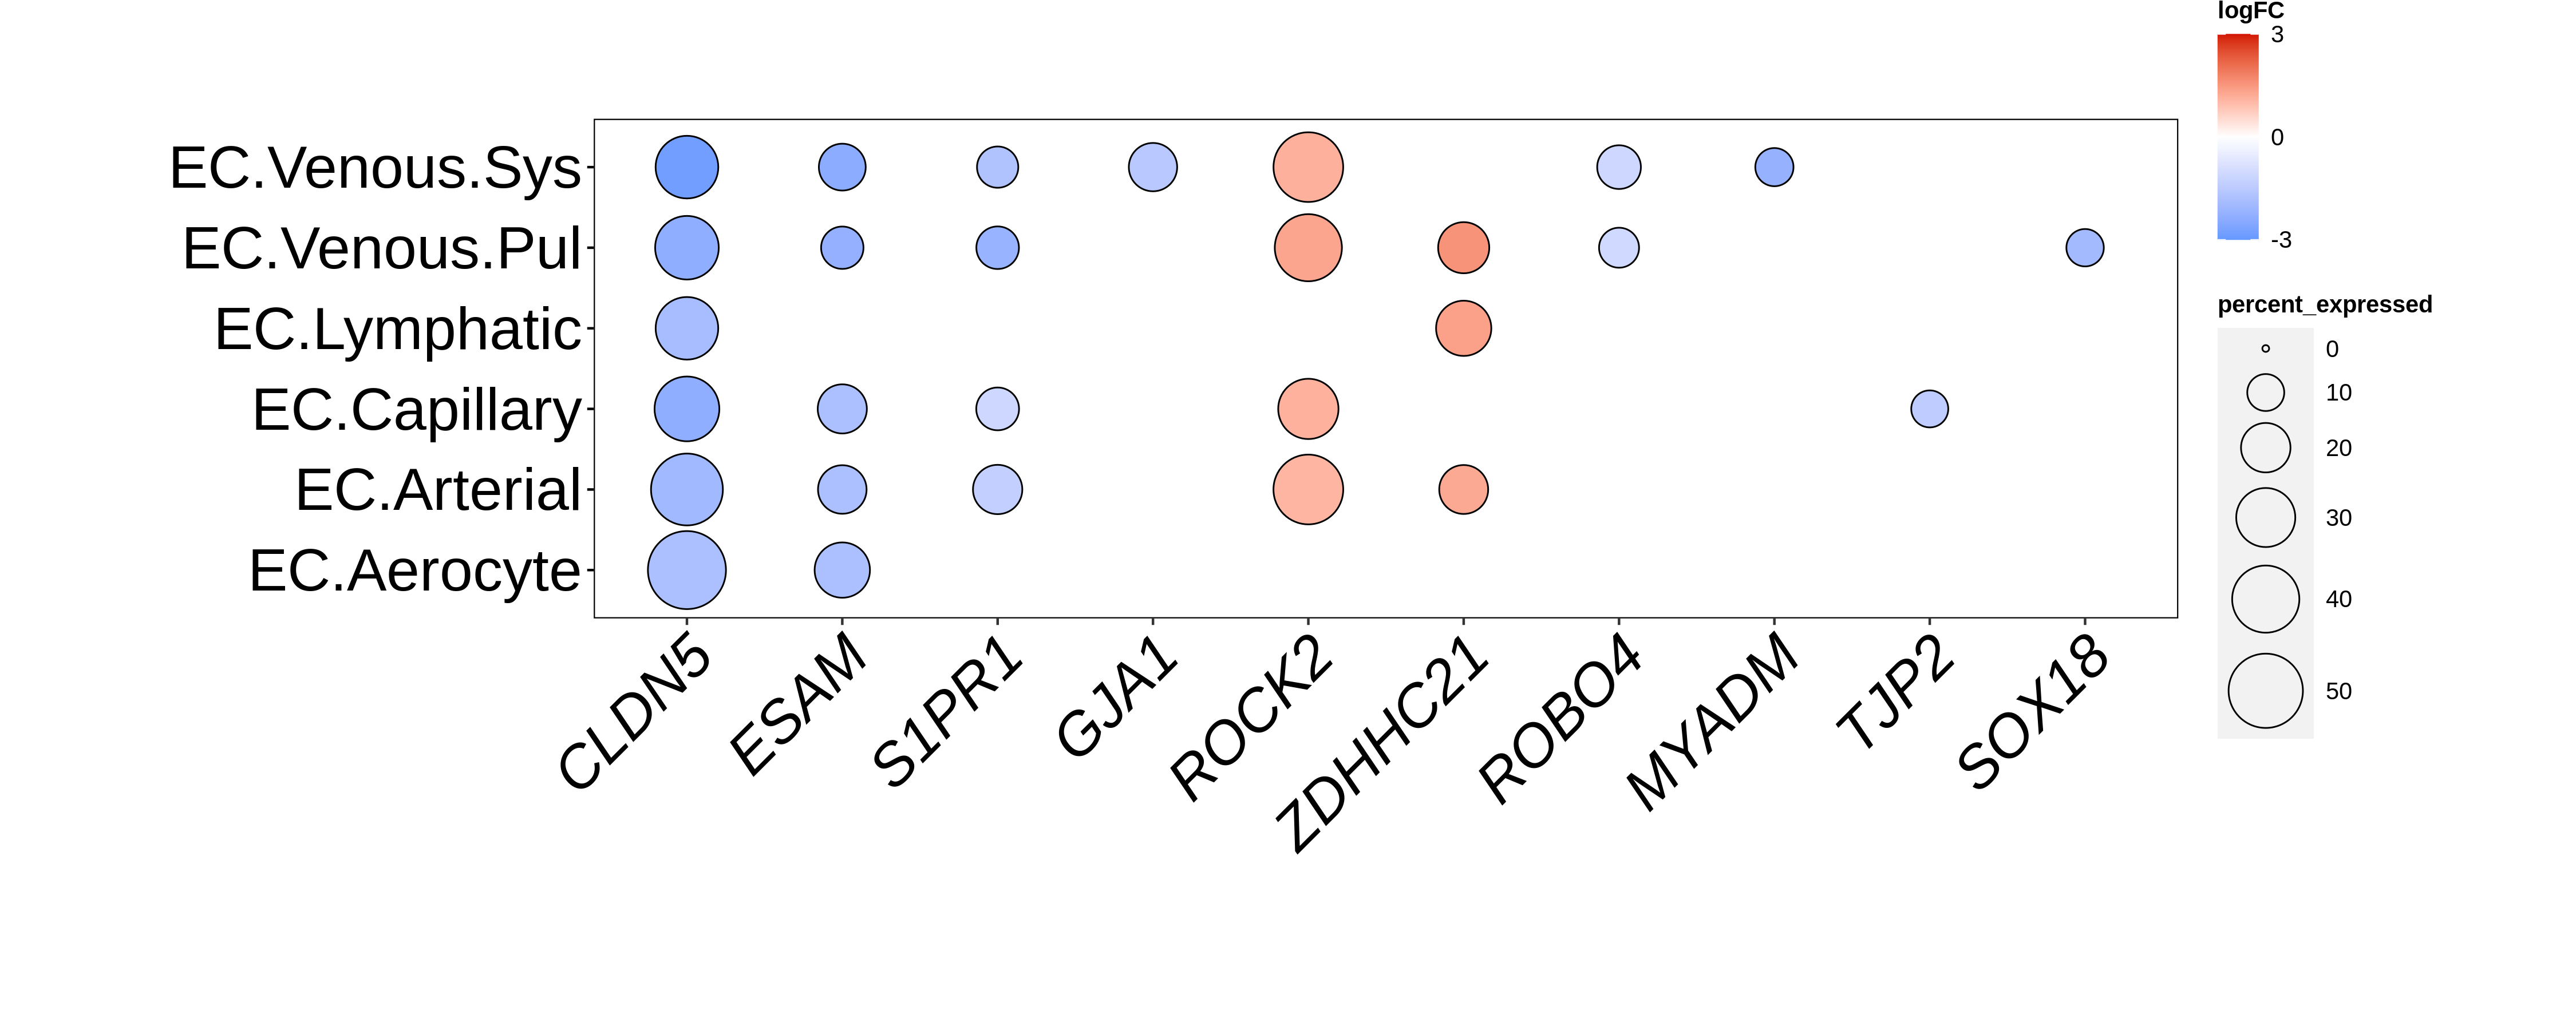

In [19]:
#pdf(width=12,height=6,file="coag_degs_margin.pdf") #uncomment to save as pdf. Change width and height accordingly
options(repr.plot.width = 15, repr.plot.height = 6, repr.plot.res = 300) # adjust width and height as necessary if more genes/clusters are included

#df3<-df2[df2$FDR<=0.05 & (df2$logFC<=-1 | df2$logFC>=1),]
#df3<-df2[df2$FDR<=0.05,]
df3<-df2
#df3$FDR_plot[df3$FDR > 0.05 | (df3$logFC > -1 & df3$logFC < 1)] <- NA
#df3$logFC[df3$FDR > 0.05 | (df3$logFC > -1 & df3$logFC < 1)] <- NA
df3$FDR_plot[df3$FDR > 0.05] <- 0
border_ldFC <- ceiling(max(abs(df3$logFC)))
#min_logp=min(df3$FDR_plot)
min_logp=0
max_logp=max(df3$percent_expressed)
g <- ggplot() + 
    geom_point(data=df3, aes(x=Gene, y=cell_state, fill=logFC, size=percent_expressed), colour="black",pch=21, stroke=0.5) + 
    theme(
              axis.text.x=element_text(size=25, color="black", angle=45, hjust=1, face = "italic"),
              axis.title=element_text(size=20, color="black", face = "bold"),
              axis.text.y=element_text(size=25, color="black"),
              axis.ticks.y=element_line(color="black"),
              plot.title = element_text(size = 25, face = "bold"),
              legend.title=element_text(size=10, face = "bold"), 
              legend.text=element_text(size=10),
              panel.background = element_rect(fill = NA, color="black"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              plot.margin = margin(50,50,50,50)
             ) + scale_fill_gradient2(low="#6699FF", mid = "white", high="#D21404", 
                                      breaks=c(-border_ldFC,0,border_ldFC), 
                                      limits=c(-border_ldFC,border_ldFC)) + xlab("")+ ylab("") + 
scale_size(range = c(1,15
                    ), limits= c(min_logp,max_logp)) 
rm (df3)
rm (border_ldFC)
rm (min_logp)
rm (max_logp)
#ggsave(plot=g,height=6,width=12,dpi=300, filename="./dotplot_all_comparisons_other_genes.pdf", useDingbats=FALSE)
g
#dev.off() #uncomment when saving pdf